# INFO 2950 Homework 7

---

## Discussion Question

The idea of using personal data and simulations to predict (and potentially manipulate) voter behaviour did not start with [Cambridge Analytica](https://en.wikipedia.org/wiki/Cambridge_Analytica); it has been going on for longer than you might think!

In 1960, John F. Kennedy's campaign employed a company called "Simulmatics" to consult on Kennedy's platform points using data prediction models, including his position on civil rights. This action was part of a larger endeavour called "Project Macroscope" led by Ed Greenfield, an advertiser.

_"With Project Macroscope, Greenfield proposed to build an 'information bank' out of election returns and public opinion surveys. They'd sort voters into voter types, down to a microscopic level, classifying for instance, 'working-class Negroes in northern cities.' For each voter type, information from the election returns and the public opinion surveys would be sorted by issue. \[...\] The machine, crammed with microscopic data about voters and issues, would act as a 'macroscope": you could ask it any question about the kind of move a candidate might make, and it would be able to tell you how voters, down to the tiniest segment of the electorate, would respond._

\[...\]

_After settling into Simulmatics’ new offices, Greenfield sent a proposal for Project Macroscope to Newton Minow, a partner at Stevenson’s Chicago law firm who had served as Stevenson’s counsel. Minow forwarded the proposal to Arthur Schlesinger, Jr., in Cambridge, where he lived two doors down from Ithiel de Sola Pool. 'Without prejudicing your judgment, my own opinion is that such a thing (a) cannot work, (b) is immoral, (c) should be declared illegal,' Minow wrote. 'Please advise.' Schlesinger looked over the proposal. 'I have pretty much your feelings about Project Macroscope,' he wrote back. 'I shudder at the implication for public leadership of the notion . . . that a man shouldn’t say something until it is cleared with the machine.' But he wasn’t going to thwart it. 'I do believe in science and don’t like to be a party to choking off new ideas.' Project Macroscope went ahead. It’s going on still."_

(excerpt from [*If Then* by Jill Lepore](https://www.goodreads.com/book/show/50489327-if-then))

**Comment on the above passage. Do you agree with Minnow and Schlesinger's criticism about Project Macroscope? On the other hand, if the goal of democracy is to faithfully represent the views of the people via their elected officials, is there a place for voter data and simulation in modern politics? If so, how might a data scientist conduct such work ethically and responsibly?**

## **Note: No response to the discussion question is required on the homework.**

---
## Pre-section

In [1]:
## Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Regression with a Categorical Input

Linear regression can only be performed with numeric inputs, but in some cases, variables of interest are categorical (discrete). On hw6, we saw that one can directly swap out the values in a categorical column with numbers when there is a natural ordering of the categories; we encoded the `cut` column using the dictionary
```
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
```
swapping out the string categories with the integers from 1 to 5, where `1` represented the worst cut category and `5` represented the best.

If the categories are not ordered, or we want to look at the effect of being in a specific category vs. not, we can use *indicator variables*. For example, if I wanted to understand how much more expensive an `Ideal` cut diamond was vs all other diamonds, I might create an indicator variable called `is_ideal`, where an entry of 1 indicates that the diamond had an `Ideal` cut, and an entry of 0 means that it had any other cut besides `Ideal` (i.e. "not `Ideal`").

We learned on hw6 that `pandas` will easily take a categorical column and create a set of indicator columns from it that reflect whether or not an observation is in a specified category using the `pandas.get_dummies()` function.

It's not immediately clear how to interpret a linear regression with indicator input variables. Let's try to understand this idea now by exploring a dataset generated based on wine reviews from [WineEnthusiast magazine](https://www.kaggle.com/zynicide/wine-reviews/version/4).

In [2]:
wines = pd.read_csv("wines.csv")
wines.head()

,country,points,price,value
0,Canada,92,30.0,3.066667
1,Canada,83,12.0,6.916667
2,Croatia,88,20.0,4.400000
3,Croatia,88,27.0,3.259259
4,Canada,92,32.0,2.875000


The original data were downloaded [here](https://www.kaggle.com/zynicide/wine-reviews/version/4), but only a few variables have been selected and it has been filtered down so that it only includes wines from Canada and Croatia.

The `points` column indicates the number of points WineEnthusiast magazine awarded the wine on a scale of 1-100, where 1 is the worst wine and 100 is the best (they only publish reviews for wines that score at least 80 points). The `price` column records the price of the wine in US dollars. The `value` column was generated by taking `points` and dividing by `price`, so this column is in units of points per US dollar. 

We're going to compare the wine values of the two countries.

There are two approaches we might take:
1. the "naïve" approach: compute the mean value for each country and compare 
1. the "sophisticated" appproach: linear regression with value as the outcome and the country as the predictor

Let's start with the naïve approach.

In [13]:
#Compute the mean `value` score for each country
can_mean = wines.query("country == 'Canada'").value.mean()
print("Mean of Canadian wine value: {0:.3f} pts/$".format(can_mean))

cro_mean = wines.query("country == 'Croatia'").value.mean()
print("Mean of Croatian wine value: {0:.3f} pts/$".format(cro_mean))

Mean of Canadian wine value: 3.146 pts/$
Mean of Croatian wine value: 4.118 pts/$


In [14]:
print("Croatian mean - Canadian mean: {0:.3f}".format(cro_mean-can_mean))

Croatian mean - Canadian mean: 0.972


On average, Croatian wines provide 0.972 pts/$ more value than Canadian wines. It could be that Croatian wines tend to score higher than Canadian wines, or that Croatian wines are less expensive, or a combination of both.

---

Now let's try the "sophisticated" approach. We'll run a linear regression using `country` to precict `value`. 

---

Using the `pd.get_dummies()` function we add a column to `wines` called `is_croatia` that indicates whether the country is "Croatia" or not. Notice that this encodes all the country information that we have.

In [232]:
wines['is_croatia'] = pd.get_dummies(wines['country'])['Croatia']
wines.head()

,country,points,price,value,is_croatia
0,Canada,92,30.0,3.066667,0
1,Canada,83,12.0,6.916667,0
2,Croatia,88,20.0,4.400000,1
3,Croatia,88,27.0,3.259259,1
4,Canada,92,32.0,2.875000,0


In [16]:
## Perform the regression
model = LinearRegression().fit(wines[['is_croatia']],wines['value'])
## Print regression coefficients
print("Regression slope is {slope:.3f}".format(slope = model.coef_[0]))
print("Regression intercept is {intercept:.3f}".format(intercept = model.intercept_))

Regression slope is 0.972
Regression intercept is 3.146


The intercept is the mean of the Canadian wines (when `is_croatia == 0`), and the slope is the difference of the means, so the intercept + the slope = the mean of the Croatian wines (when `is_croatia == 1`).  

This makes sense if we remember the regression equation:

$$ Y = \beta_0 + \beta_1 X. $$

In the case of this regression, $X$ is the indicator variable `is_croatia`, and $Y$ is `value`. When $X=0$ (a Canadian wine), the value is predicted as the intercept, $\beta_0$, while when $X=1$ (a Croatian wine), the value is predicted as the intercept plus the slope, $\beta_0+\beta_1$. So what the regression does is it guesses the Canadian sample mean for Canadian wines and the Croatian sample mean for Croatian wines, capturing the difference in value through the slope parameter. (The slope is just rise over run, so the rise is Croatian mean - Canadian mean, and the run is $1-0$.) 

**The "naïve" approach and the "sophisticated" approach are the same!** Don't be fooled by the fact that "linear regression" sounds fancy---it isn't necessarily. It's all about how you use it and the conclusions we draw from it.


---

# Homework

## Part 1: Simpson's Paradox

Last week, when analyzing the `diamonds` dataset on hw6, you may have noticed that the sign of a variable's regression slope may change when going from a single variable regression to a multivariable regression. This phenomenon is known as [**Simpson's paradox**](https://en.wikipedia.org/wiki/Simpson%27s_paradox). Let's explore it further now using the [`penguins` dataset](https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/):

In [249]:
## load penguins data
penguins = sns.load_dataset('penguins')

Our goal will be to predict bill depth (in mm) using bill length (in mm). We will do so using linear regression, in which case we need to ensure there are no missing values in these two columns:

In [250]:
## drop observations with NaN in specified columns
pengs = penguins.dropna(subset = ['bill_length_mm', 'bill_depth_mm'])

Use this cleaned `pengs` table in the problems in part 1.

---

### Problem 1 (4 pts)

Use `sns.regplot()` to make a scatterplot with a linear regression line, where bill length is on the $x$-axis and bill depth is on the $y$-axis (tutorial [here](https://seaborn.pydata.org/tutorial/regression.html)). 

Use `sklearn` to fit a single variable linear regression with bill length as the predictor and bill depth as the outcome. Print the regression slope of the bill length variable rounded to two decimal places.

---

Regression slope is -0.09


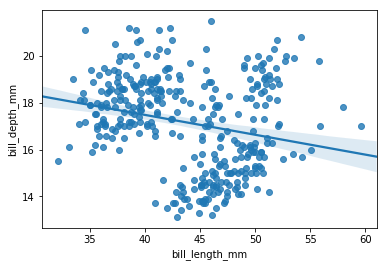

In [251]:
sns.regplot(x="bill_length_mm", y="bill_depth_mm", data=pengs)

linear_model = LinearRegression()

linear_model.fit(np.asarray(pengs.bill_length_mm).reshape(-1,1), pengs.bill_depth_mm)

print("Regression slope is {:.2f}".format(linear_model.coef_[0]))



---

### Problem 2 (4 pts)

What does this regression slope indicate about the relationship between bill length and depth? Also, specifically interpret the *value* of the slope: what does this number mean in terms of the bill length and depth measurements?

---

The regression slope indicates the expected change for the the bill depth per increment in increase of bill length. Specifically, the bill depth is expected do decrease by -0.09 mm for every 1 mm increase in bill length.

---

### Problem 3 (8 pts)

(a) Use `sns.lmplot()` to make a scatterplot with bill length on the $x$-axis, bill depth on the $y$-axis, data colored by  species and a different linear regression line for each species (tutorial [here](https://seaborn.pydata.org/tutorial/regression.html)). 

(b) Create indicator variables for each species.

(c) Use `sklearn` to fit a multivariable linear regression with bill length and each of the species indicator variables as predictors and bill depth as the outcome. Print the regression coefficient of the bill length variable rounded to two decimal places.

What does this regression slope indicate about the *species-specific* relationship between bill length and depth?

---

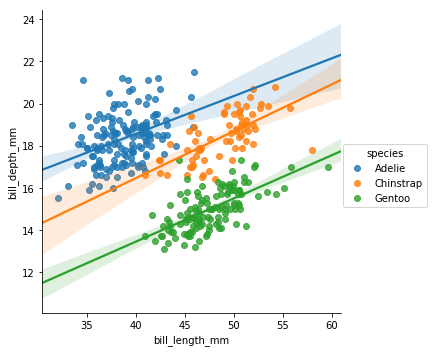

In [252]:
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", data=pengs, hue = 'species')

In [253]:
pengs = pengs.copy()
pengs['is_Adelie'] = pd.get_dummies(pengs['species'])['Adelie']
pengs['is_Chinstrap'] = pd.get_dummies(pengs['species'])['Chinstrap']
pengs['is_Gentoo'] = pd.get_dummies(pengs['species'])['Gentoo']

In [254]:
multi_reg = LinearRegression()
multi_reg.fit(pengs[['bill_length_mm','is_Adelie','is_Chinstrap','is_Gentoo']], pengs.bill_depth_mm)
print("Regression slope for bill length is {:.2f}".format(multi_reg.coef_[0]))

Regression slope for bill length is 0.20


The regression shows that for when looking at any particular species, there is an expected 0.20 mm increase in bill depth for 1 mm increase in the bill length. 

---

### Problem 4 (4 pts)

Explain why the regression slope of the bill length variable changed signs when we went from the single variable regression over bill length to the multivariable model with species information? Which model do you think better explains the relationship between bill length and bill depth (justify your answer)?

---

This is an example of Simpson's paradox. The single variable regression simply took all of the data points and produced a regression which trended with a slightly downward slope. When evaluating the relationship between bill length and bill depth using the data points from each species separately and then weighing those regressions (which are all positive in slope), results in a positive regression coefficient in the multivariable model. The multivariable model is more efective at explaining the relationship betwee bill length and bill depth. Some species can have bigger body parts than others and so categorizing them by species and evaluating them before producing a regression coefficient yields a more clear picture of how the trends between bill length and depth act.

---

### Problem 5 (4 pts)

Print the other regression coefficients from the multivariable model stored in the `.coef_` array (exclude the bill length coefficient). What do these other coefficients represent?

---

In [255]:
print("Regression coefficient for is_Adelie is {:.2f}".format(multi_reg.coef_[1]))
print("Regression coefficient for is_Chinstrap is {:.2f}".format(multi_reg.coef_[2]))
print("Regression coefficient for is_Gentoo is {:.2f}".format(multi_reg.coef_[3]))


Regression coefficient for is_Adelie is 2.35
Regression coefficient for is_Chinstrap is 0.41
Regression coefficient for is_Gentoo is -2.76


These coefficients represent the disparity in bill depth between a particular species and the other two species.

---

# Part 2: Logistic Regression and Bootstrap Resampling

Logistic regression is a form of linear regression used to model a *binary outcome*. Let's try to predict penguin sex using body mass. First, let's drop all rows from the original data that have a NaN in the body mass and/or sex columns:

In [256]:
## drop observations with NaN in specified columns
pengs2 = penguins.dropna(subset = ['body_mass_g', 'sex'])

Use this cleaned `pengs2` table in the problems in part 2.

---

### Problem 6 (4 pts)

Split the data into a training and test set using the `train_test_split()` function. *Note: The `train_test_split()` function has already been imported from `sklearn` above and can be used without a prefix.* Set the test set size to 20% and make sure the `random_state` parameter is set to 15, so everyone gets the same "random" split. 

Print the first few lines of the training and test sets, with a print statement before each table to label which is which.

---

In [257]:
mass_train, mass_test, sex_train, sex_test = train_test_split(pengs2.body_mass_g, pengs2.sex, test_size=0.2, random_state=15)

print("Training set for body mass:")
print(mass_train.head())
print("\n")

print("Testing set for body mass:")
print(mass_test.head())
print("\n")

print("Training set for sex:")
print(sex_train.head())
print("\n")

print("Testing set for sex:")
print(sex_test.head())





Training set for body mass:
318    4625.0
224    5400.0
132    3500.0
86     3800.0
106    3750.0
Name: body_mass_g, dtype: float64


Testing set for body mass:
85     3550.0
130    3325.0
92     3400.0
195    3500.0
105    3550.0
Name: body_mass_g, dtype: float64


Training set for sex:
318    FEMALE
224      MALE
132    FEMALE
86       MALE
106    FEMALE
Name: sex, dtype: object


Testing set for sex:
85       MALE
130    FEMALE
92     FEMALE
195    FEMALE
105      MALE
Name: sex, dtype: object


---

### Problem 7 (4 pts)

Fit a logistic regression model with sex as the outcome and body mass as the predictor. Print the regression coefficient **rounded to 3 significant digits**.

---

In [258]:
log_reg = LogisticRegression()
log_reg.fit(np.asarray(mass_train).reshape(-1,1), sex_train)
print("Logisitc regression coefficient is {}".format(np.round(log_reg.coef_[0][0],6))) 



Logisitc regression coefficient is 0.000819


---

### Problem 8 (4 pts)

Use the model to predict the sex of penguins in the test set. Report the prediction accuracy (number of correct predictions divided by the total number of predictions) as a percentage rounded to one decimal place. 

---

In [259]:
predictions = log_reg.predict(np.asarray(mass_test).reshape(-1,1))

accurate = 100*log_reg.score(np.asarray(mass_test).reshape(-1,1), sex_test)
print("The prediction accuracy for the sex in the test set is {}%".format(np.round(accurate,1)))


The prediction accuracy for the sex in the test set is 55.2%


---

### Problem 9 (4 pts)

Repeat the previous exercise for the training set.

---

In [260]:
predict = log_reg.predict(np.asarray(mass_train).reshape(-1,1))
sextrain = np.asarray(sex_train)

percent = 100*log_reg.score(np.asarray(mass_train).reshape(-1,1), sex_train)

print("The prediction accuracy for the sex in the training set is {}%".format(np.round(percent,1)))
        

The prediction accuracy for the sex in the training set is 65.0%


---

### Problem 10 (4 pts)

Based on the above prediction accuracies, do you think this is a good model for predicting penguin sex (justify your answer)? How might you improve this model with the data to which you already have access?

---

This isn't a good model for predicted penguin sex as the prediction accuracies aren't significantly different that outright guessing the gender of the penguin. To improve this, I would conduct multiple logistic regression analyses on the data with the incorporation of the species. The disparities between the species in body mass may have influenced how gender was being identified since the typical body mass of the male of one species could be about the same as the typical body mass of the female of another species.

---

### Problem 11 (6 pts)
**You must work alone on this problem. You may not seek help in study hall or on Ed except to clarify the problem.**

Using the bootstrap resampling method, generate a 99% confidence interval for the mean of the absolute difference of two standard normal variables. Start by generating a sample of 30 data points from this distribution and resampling a large number of times.

Approximate the true mean of the distribution correct to 2 decimal places. Does your bootstrapped confidence interval contain the true mean?

---

The bootstrap confidence interval contains the true mean.